In [1]:
from datetime import datetime    #زمان
import pandas as pd                    #پانداس
import matplotlib.pyplot as plt         #مصورسازی
import numpy as np          
import finpy_tse as fpy            # دریافت دیتای قیمتی از finpy
import pytse_client as tse
import yfinance as yf
import ta 
import math as math
import asyncio

In [2]:


# دریافت داده قیمتی شاخص کل بورس

def index_kol(bars:int=9500):
    while True:
        try:
            data=fpy.Get_CWI_History(ignore_date=True,double_date=True)
            data=data.iloc[:-bars:-1][::-1]
            data.index=data['Date']
            return(data)
        except Exception as e:
            print(f"An error occurred: {e}")
            asyncio.sleep(2)  # Sleep for 10 seconds before retrying



symbol_data=index_kol()
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
2023-12-13,2023-12-13,2161610.0,2161610.0,2158080.0,2158088.0,2158088.5,4607520016
2023-12-16,2023-12-16,2158840.0,2171820.0,2158840.0,2171823.0,2171823.2,4859395624
2023-12-18,2023-12-18,2173520.0,2207650.0,2173520.0,2207653.0,2207653.1,8049806556


In [3]:
symbol_data['ma12']=symbol_data['Close'].rolling(12).mean()   #محاسبه مووینگ 12 روزه ساده 

In [4]:
symbol_data['ma26']=symbol_data['Close'].rolling(26).mean()    #محاسبه مووینگ 26 روزه ساده 

In [5]:
symbol_data['ma12_26']=symbol_data['ma12']-symbol_data['ma26']     # فرمول محاسبه macd 

In [6]:
symbol_data['ma_signal9']=symbol_data['ma12_26'].rolling(9).mean()     # مووینگ سیگنال

In [7]:
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume,ma12,ma26,ma12_26,ma_signal9
Date,,,,,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624,NaN,NaN,NaN,NaN
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353,NaN,NaN,NaN,NaN
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115,NaN,NaN,NaN,NaN
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653,NaN,NaN,NaN,NaN
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,2023-12-13,2161610.0,2161610.0,2158080.0,2158088.0,2158088.5,4607520016,2.134819e+06,2.081101e+06,53718.083333,30143.538462
2023-12-16,2023-12-16,2158840.0,2171820.0,2158840.0,2171823.0,2171823.2,4859395624,2.146481e+06,2.085558e+06,60923.153846,35762.471510
2023-12-18,2023-12-18,2173520.0,2207650.0,2173520.0,2207653.0,2207653.1,8049806556,2.158757e+06,2.091449e+06,67307.666667,41696.966524


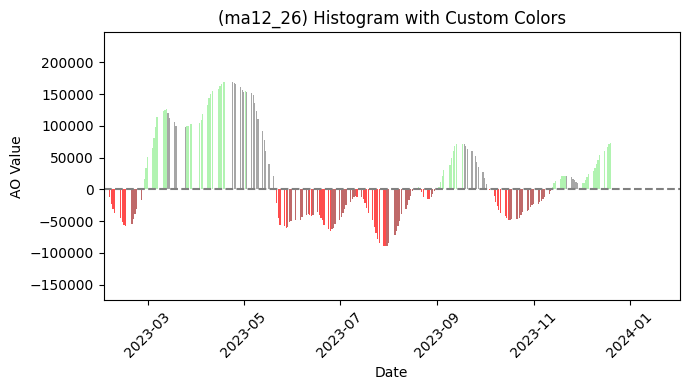

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# تبدیل ستون 'Date' به شیء DateTime
symbol_data['Date'] = pd.to_datetime(symbol_data['Date'])

# افزودن ستون 'Color' بر اساس شرایط مختلف
symbol_data['Color'] = 'gray'  # رنگ پیشفرض

# شرایط برای تعیین رنگ‌ها
positive_condition = (symbol_data['ma12_26'] > 0) & (symbol_data['ma12_26'] > symbol_data['ma12_26'].shift(1))
negative_condition = (symbol_data['ma12_26'] < 0) & (symbol_data['ma12_26'] < symbol_data['ma12_26'].shift(1))

symbol_data.loc[positive_condition, 'Color'] = 'lightgreen'  # سبز روشن
symbol_data.loc[negative_condition, 'Color'] = 'darkgreen'  # سبز تاریک
symbol_data.loc[negative_condition & (symbol_data['ma12_26'] < symbol_data['ma12_26'].shift(1)), 'Color'] = 'red'  # قرمز پررنگ
symbol_data.loc[(symbol_data['ma12_26'] < 0) & (symbol_data['ma12_26'] > symbol_data['ma12_26'].shift(1)), 'Color'] = 'brown'  # قهوه ای

# رسم Histogram با رنگ‌های تعیین شده
plt.figure(figsize=(7, 4))
plt.xlim([pd.to_datetime('2023-02-01'), pd.to_datetime('2024-02-02')])

# استفاده از ستون 'Color' برای تعیین رنگ
plt.bar(symbol_data['Date'], symbol_data['ma12_26'], color=symbol_data['Color'], alpha=0.7)

# افزودن خط صفر
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('(ma12_26) Histogram with Custom Colors')
plt.xlabel('Date')
plt.ylabel('AO Value')
plt.xticks(rotation=45)
plt.tight_layout()

# نمایش نمودار
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


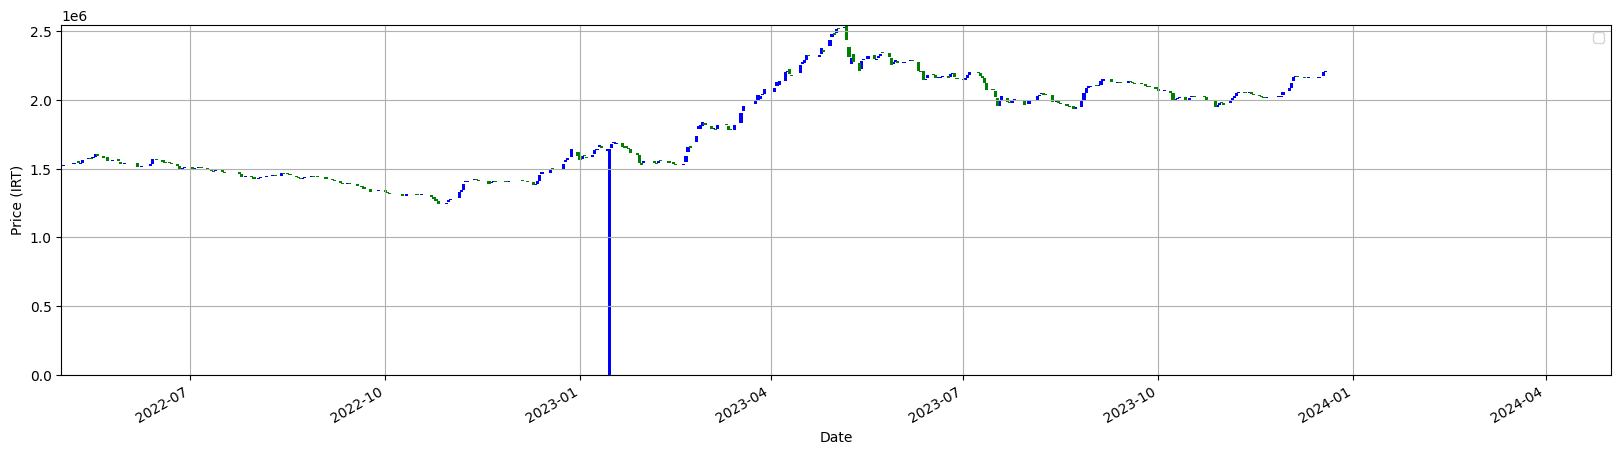

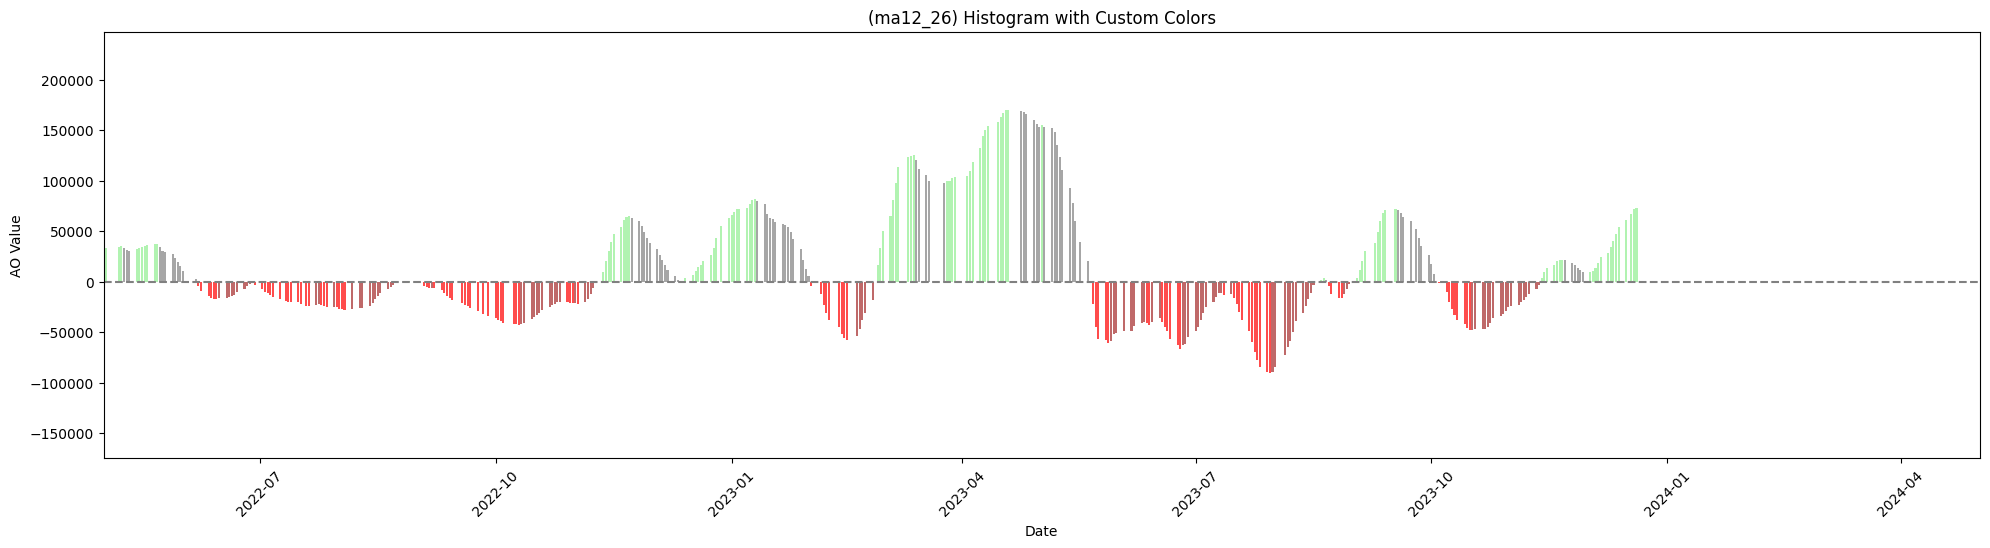

In [9]:

import datetime


plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.xlim([datetime.date(2022, 5, 1), datetime.date(2024, 10, 2)])





# "up" dataframe will store the stock_prices 
# when the closing stock price is greater
# than or equal to the opening stock prices
up = symbol_data[symbol_data['Close'] >= symbol_data['Open']]
  
# "down" dataframe will store the stock_prices
# when the closing stock price is
# lesser than the opening stock prices
down = symbol_data[symbol_data['Close']< symbol_data['Open']]
  
# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'blue'
  
# When the stock prices have increased, then it 
# will be represented by green color candlestick
col2 = 'green'
  
# Setting width of candlestick elements
width = 1.5
width2 = 1.5
  
# Plotting up prices of the stock
plt.bar(up.index, up['Close']-up['Open'], width, bottom=up['Open'], color=col1)
plt.bar(up.index, up['High']-up['Close'], width2, bottom=up['Close'], color=col1)
plt.bar(up.index, up['Low']-up['Open'], width2, bottom=up['Open'], color=col1)
  
# Plotting down prices of the stock
plt.bar(down.index, down['Close']-down['Open'], width, bottom=down['Open'], color=col2)
plt.bar(down.index, down['High']-down['Open'], width2, bottom=down['Open'], color=col2)
plt.bar(down.index, down['Low']-down['Close'], width2, bottom=down['Close'], color=col2)
  
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')

# plt.plot(symbol_data['matx_symbol'],lw=2,c='orange',label='matx(ma20shift5)')


plt.grid()


plt.xlabel('Date')
plt.ylabel('Price (IRT)')

plt.legend()





plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
plt.xlim([datetime.date(2022, 5, 1), datetime.date(2024, 10, 2)])

# تبدیل ستون 'Date' به شیء DateTime
symbol_data['Date'] = pd.to_datetime(symbol_data['Date'])

# افزودن ستون 'Color' بر اساس شرایط مختلف
symbol_data['Color'] = 'gray'  # رنگ پیشفرض

# شرایط برای تعیین رنگ‌ها
positive_condition = (symbol_data['ma12_26'] > 0) & (symbol_data['ma12_26'] > symbol_data['ma12_26'].shift(1))
negative_condition = (symbol_data['ma12_26'] < 0) & (symbol_data['ma12_26'] < symbol_data['ma12_26'].shift(1))

symbol_data.loc[positive_condition, 'Color'] = 'lightgreen'  # سبز روشن
symbol_data.loc[negative_condition, 'Color'] = 'darkgreen'  # سبز تاریک
symbol_data.loc[negative_condition & (symbol_data['ma12_26'] < symbol_data['ma12_26'].shift(1)), 'Color'] = 'red'  # قرمز پررنگ
symbol_data.loc[(symbol_data['ma12_26'] < 0) & (symbol_data['ma12_26'] > symbol_data['ma12_26'].shift(1)), 'Color'] = 'brown'  # قهوه ای



# استفاده از ستون 'Color' برای تعیین رنگ
plt.bar(symbol_data['Date'], symbol_data['ma12_26'], color=symbol_data['Color'], alpha=0.7)

# افزودن خط صفر
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('(ma12_26) Histogram with Custom Colors')
plt.xlabel('Date')
plt.ylabel('AO Value')
plt.xticks(rotation=45)
plt.tight_layout()




# displaying candlestick chart of stock data 
# of a week
plt.show()